<div style="background-color: turquoise; padding: 20px; text-align: center; border-radius: 10px;">
    <h1 style="color: purple; font-weight: bold;">
        &#8226;&#8226; 
        <span style="color: purple;"> Multiple</span> <span style="color: yellow;">Linear</span> <span style="color: magenta;">Regression</span> 
        &#8226;&#8226;
    </h1>
</div>

<img src='https://thumbs.dreamstime.com/b/media-advertisement-vector-television-radio-antenna-laptop-screen-advertisement-product-promotion-newspaper-show-tv-139820276.jpg'>
<a href='https://classroom.google.com/c/NzIwMjcyMjkxMjgy/a/NzIwMjcyMjkxNDMz/details' target=_blank>
Click here for the dataset file</a>

**Import library**

In [3]:
import pandas as pd
import warnings
warnings.filterwarnings("ignore")
pd.set_option("display.max_columns",55)

In [4]:
df=pd.read_csv('advertising.csv')

In [3]:
pwd

'C:\\Users\\YSelim\\Documents\\Ki2.0\\Project Based One\\Multiple Linear Regression'

**EDA - Exploratory Data Analysis**

In [5]:
df.head()

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9


In [6]:
df.shape

(200, 4)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   TV         200 non-null    float64
 1   Radio      200 non-null    float64
 2   Newspaper  200 non-null    float64
 3   Sales      200 non-null    float64
dtypes: float64(4)
memory usage: 6.4 KB


In [8]:
df.isnull().sum()

TV           0
Radio        0
Newspaper    0
Sales        0
dtype: int64

In [10]:
df.describe()

,TV,Radio,Newspaper,Sales
count,200.000000,200.000000,200.000000,200.000000
mean,147.042500,23.264000,30.554000,14.022500
std,85.854236,14.846809,21.778621,5.217457
min,0.700000,0.000000,0.300000,1.600000
25%,74.375000,9.975000,12.750000,10.375000
50%,149.750000,22.900000,25.750000,12.900000
75%,218.825000,36.525000,45.100000,17.400000
max,296.400000,49.600000,114.000000,27.000000


**Data Visualization**

In [ ]:
import matplotlib.pyplot as plt

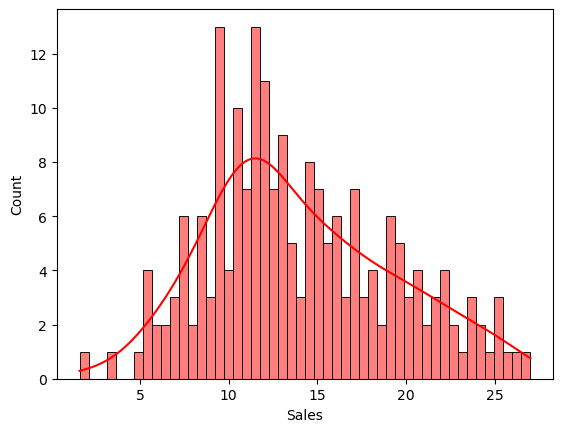

In [13]:
sns.histplot(x=df['Sales'],kde=True,color='red',bins=50); 

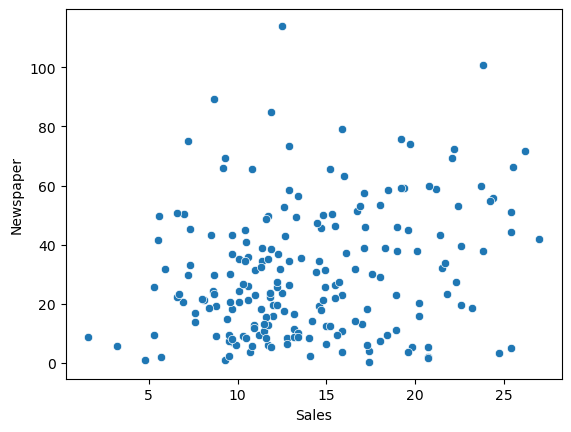

In [14]:
sns.scatterplot(x='Sales',y='Newspaper',data=df);

**3D Visualization**

In [15]:
import plotly.express as px

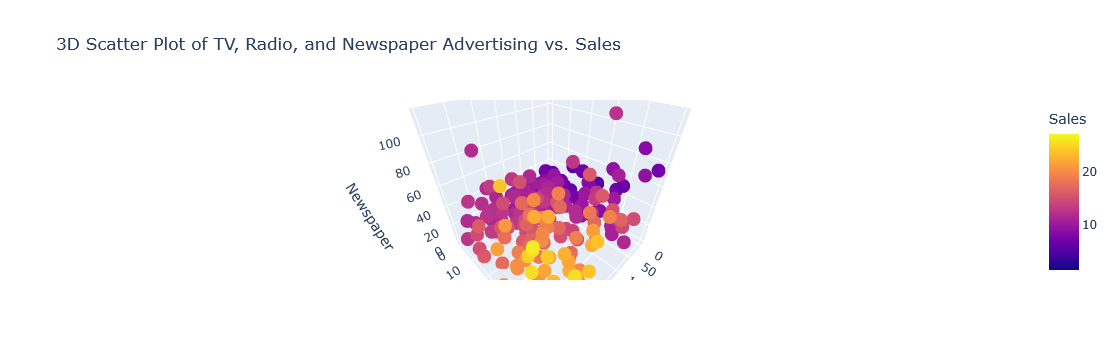

In [23]:
px.scatter_3d(df, x='TV', y='Radio', z='Newspaper', color='Sales',
                     title='3D Scatter Plot of TV, Radio, and Newspaper Advertising vs. Sales')

In [12]:
import seaborn as sns

In [11]:
df.corr(numeric_only=True)

,TV,Radio,Newspaper,Sales
TV,1.000000,0.054809,0.056648,0.782224
Radio,0.054809,1.000000,0.354104,0.576223
Newspaper,0.056648,0.354104,1.000000,0.228299
Sales,0.782224,0.576223,0.228299,1.000000


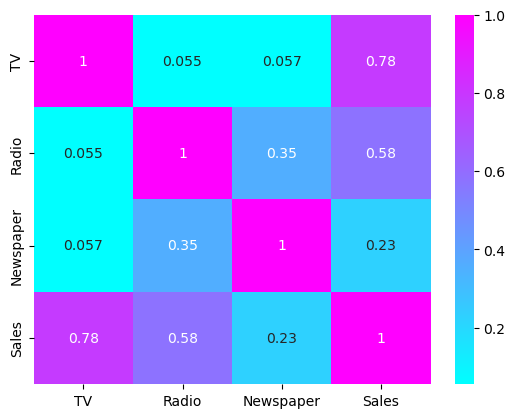

In [14]:
sns.heatmap(df.corr(numeric_only=True),annot=True,cmap='cool');

**P - Deger**

In [6]:
from scipy.stats import ttest_ind

In [7]:
_,p=ttest_ind(df['Sales'],df['TV'])
p

3.287531216460733e-70

In [38]:
_,p=ttest_ind(df['Sales'],df['Radio'])
p

1.580156222732028e-15

In [8]:
_,p=ttest_ind(df['Sales'],df['Newspaper'])
p

1.0345848819761895e-22

In [9]:
t,p=ttest_ind(df['Sales'],df['Radio'])
p

1.580156222732028e-15

**Feature Engineering**

In [24]:
x=df.drop(['Sales'],axis=1)
y=df[['Sales']]

In [25]:
x = pd.get_dummies(x, drop_first=True)

In [26]:
from sklearn.model_selection import train_test_split

In [27]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.20,random_state=42)

In [28]:
print(x_test)

        TV  Radio  Newspaper
95   163.3   31.6       52.9
15   195.4   47.7       52.9
30   292.9   28.3       43.2
158   11.7   36.9       45.2
128  220.3   49.0        3.2
115   75.1   35.0       52.7
69   216.8   43.9       27.2
170   50.0   11.6       18.4
174  222.4    3.4       13.1
45   175.1   22.5       31.5
66    31.5   24.6        2.2
182   56.2    5.7       29.7
165  234.5    3.4       84.8
78     5.4   29.9        9.4
186  139.5    2.1       26.6
177  170.2    7.8       35.2
56     7.3   28.1       41.4
152  197.6   23.3       14.2
82    75.3   20.3       32.5
68   237.4   27.5       11.0
124  229.5   32.3       74.2
16    67.8   36.6      114.0
148   38.0   40.3       11.9
93   250.9   36.5       72.3
65    69.0    9.3        0.9
60    53.5    2.0       21.4
84   213.5   43.0       33.8
67   139.3   14.5       10.2
125   87.2   11.8       25.9
132    8.4   27.2        2.1
9    199.8    2.6       21.2
18    69.2   20.5       18.3
55   198.9   49.4       60.0
75    16.9   4

In [29]:
print(y_test)

     Sales
95    16.9
15    22.4
30    21.4
158    7.3
128   24.7
115   12.6
69    22.3
170    8.4
174   11.5
45    14.9
66     9.5
182    8.7
165   11.9
78     5.3
186   10.3
177   11.7
56     5.5
152   16.6
82    11.3
68    18.9
124   19.7
16    12.5
148   10.9
93    22.2
65     9.3
60     8.1
84    21.7
67    13.4
125   10.6
132    5.7
9     10.6
18    11.3
55    23.7
75     8.7
150   16.1
104   20.7
135   11.6
137   20.8
164   11.9
76     6.9


**Modelling**

In [30]:
from sklearn.linear_model import LinearRegression
lr=LinearRegression()

In [31]:
model=lr.fit(x_train,y_train)

In [32]:
tahmin=model.predict(x_test)

In [33]:
from sklearn.metrics import r2_score, mean_squared_error

In [34]:
mean_squared_error(y_test,tahmin)**.5 

1.781599661533451

In [35]:
r2_score(y_test,tahmin)

0.8994380241009119

In [49]:
lr.coef_

array([[0.04472952, 0.18919505, 0.00276111]])

In [50]:
feature_importance=pd.DataFrame({'Feature':x_train.columns,'Coefs':lr.coef_[0]})

In [51]:
feature_importance=feature_importance.sort_values(by='Coefs',ascending=False)

In [52]:
feature_importance

,Feature,Coefs
1,Radio,0.189195
0,TV,0.044730
2,Newspaper,0.002761


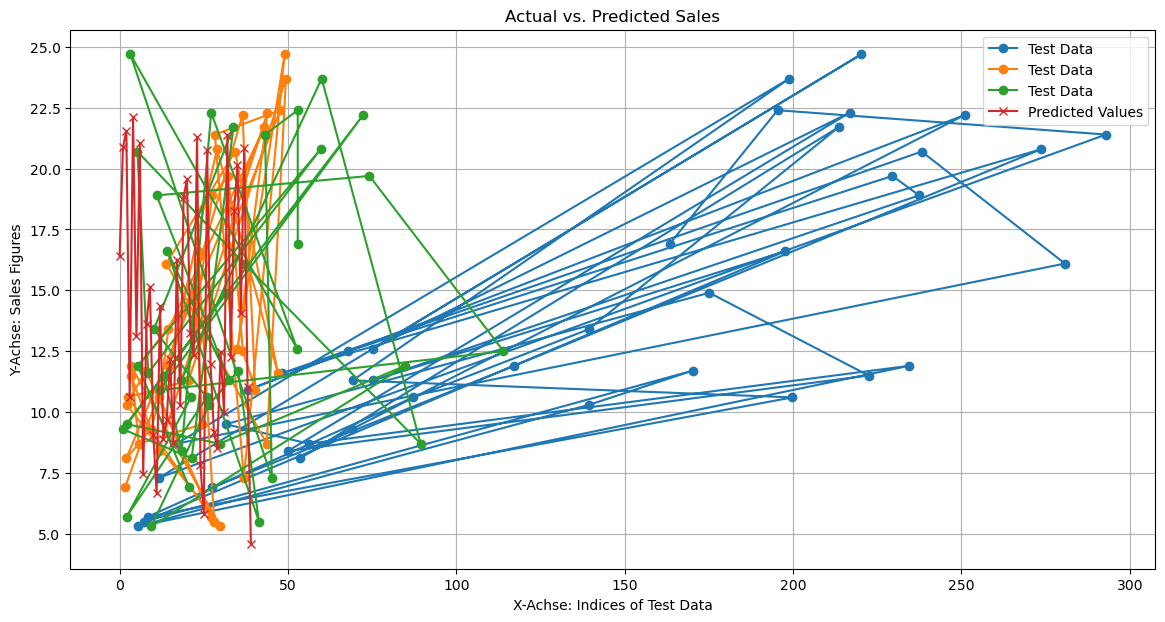

In [62]:
plt.figure(figsize=(14, 7))
plt.plot(x_test,y_test.values, label='Test Data', marker='o')  # Tatsächliche Werte
plt.plot(tahmin, label='Predicted Values', marker='x')  # Vorhergesagte Werte

plt.title('Actual vs. Predicted Sales')
plt.xlabel('X-Achse: Indices of Test Data')
plt.ylabel('Y-Achse: Sales Figures')
plt.legend()
plt.grid()
plt.show()

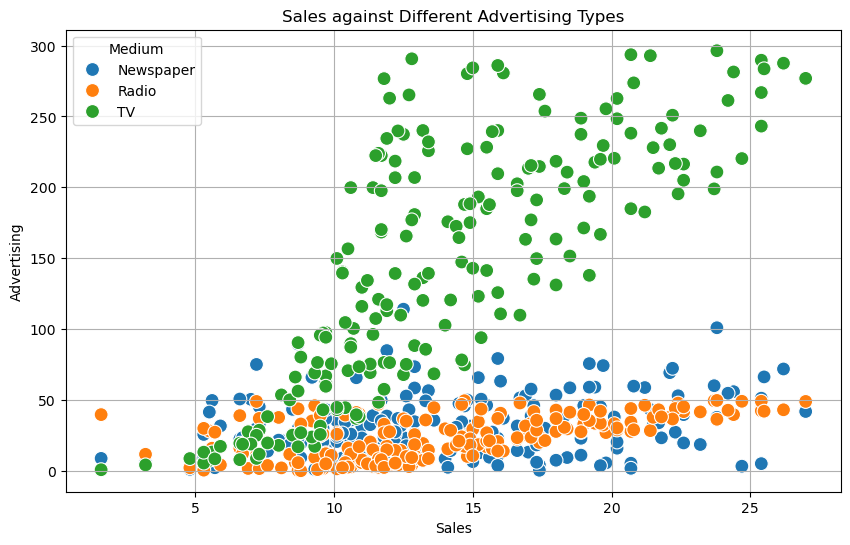

In [60]:
# Daten in langes Format umwandeln
df_melted = df.melt(id_vars='Sales', value_vars=['Newspaper', 'Radio', 'TV'], 
                    var_name='Medium', value_name='Advertising')

# Scatterplot erstellen
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Sales', y='Advertising', hue='Medium', data=df_melted, s=100)

# Diagramm beschriften
plt.title('Sales against Different Advertising Types')
plt.xlabel('Sales')
plt.ylabel('Advertising')
plt.legend(title='Medium')
plt.grid()

# Diagramm anzeigen
plt.show()

In [ ]:
# Aus der Erarbeitung lässt sich folgendes Ergebnis ableiten. Die 